# Clustering GPA and IQ: Academic and Cognitive Insights

**Author:** SALMAN FAISHAL

## Overview

This is a notebook for performing clustering analysis on a dataset containing GPA and IQ to gain insights into academic and cognitive aspects. In this notebook, I will perform several analysis steps, including data exploration, preprocessing, feature selection, and clustering.

## Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 

In [3]:
data = pd.read_csv('gpa_iq.csv') # read csv
data = data.drop(columns=['obs']) # drop column 'obs'
data.head()

,gpa,iq,gender,concept
0,7.940,111,2,67
1,8.292,107,2,43
2,4.643,100,2,52
3,7.470,107,2,66
4,8.882,114,1,58


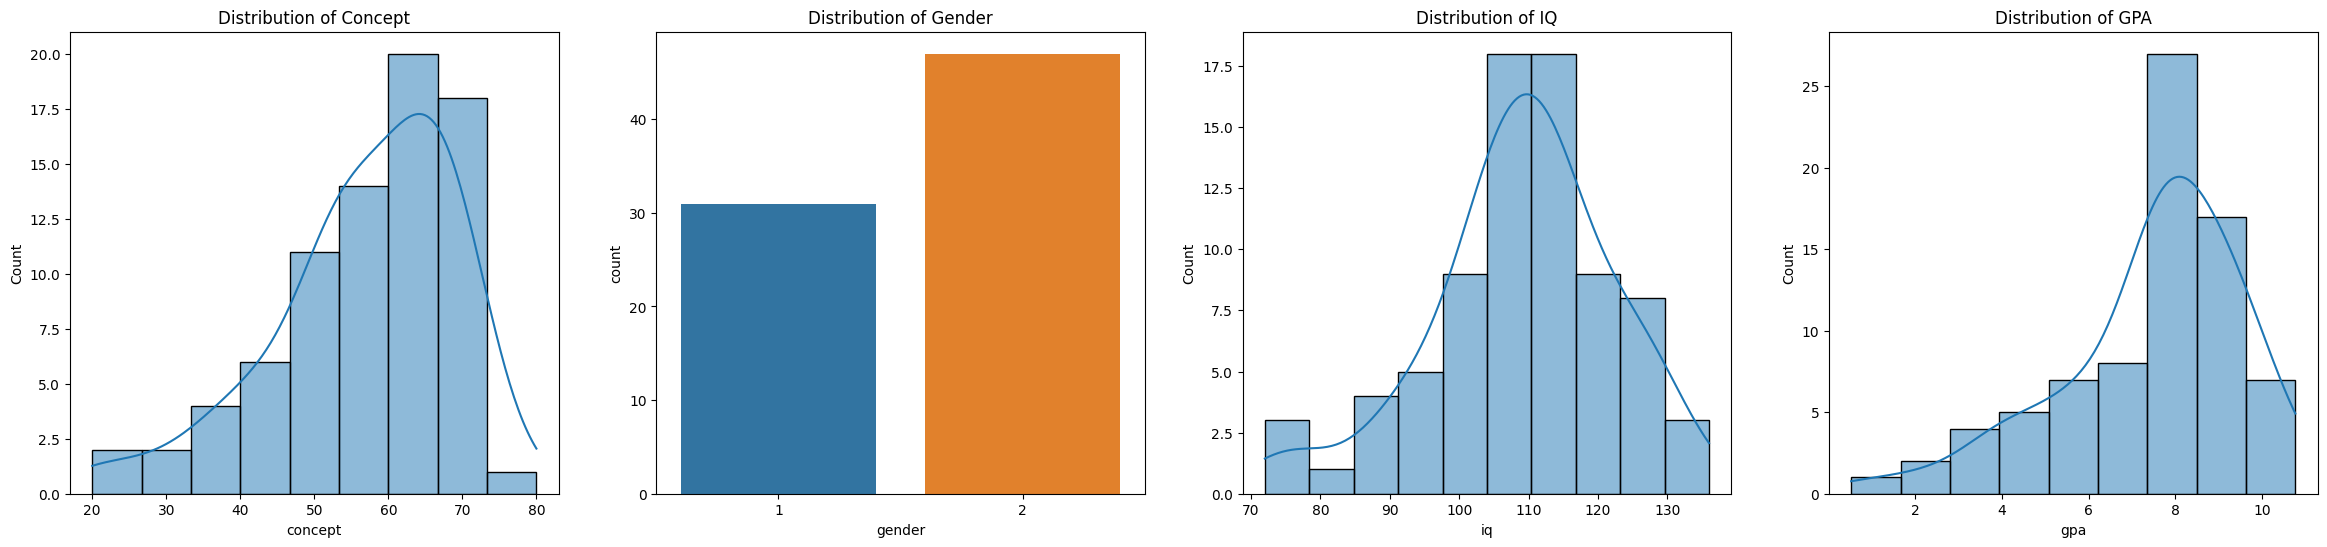

In [4]:
# Create a figure with a size of 29x6 inches
plt.figure(figsize=(29, 6))

# Subplot 1: Distribution of Concept
plt.subplot(1, 4, 1)  # 1 row, 4 columns, this is the 1st subplot
sns.histplot(x=data.concept, kde=True)  # Create a histogram with a kernel density estimate (KDE)
plt.title('Distribution of Concept')  # Set the title of the subplot

# Subplot 2: Distribution of Gender
plt.subplot(1, 4, 2)  # 1 row, 4 columns, this is the 2nd subplot
sns.countplot(data=data, x='gender')  # Create a count plot for gender distribution
plt.title('Distribution of Gender')  # Set the title of the subplot

# Subplot 3: Distribution of IQ
plt.subplot(1, 4, 3)  # 1 row, 4 columns, this is the 3rd subplot
sns.histplot(x=data.iq, kde=True)  # Create a histogram with a kernel density estimate (KDE)
plt.title('Distribution of IQ')  # Set the title of the subplot

# Subplot 4: Distribution of GPA
plt.subplot(1, 4, 4)  # 1 row, 4 columns, this is the 4th subplot
sns.histplot(x=data.gpa, kde=True)  # Create a histogram with a kernel density estimate (KDE)
plt.title('Distribution of GPA')  # Set the title of the subplot

# Display the subplots in the figure
plt.show()


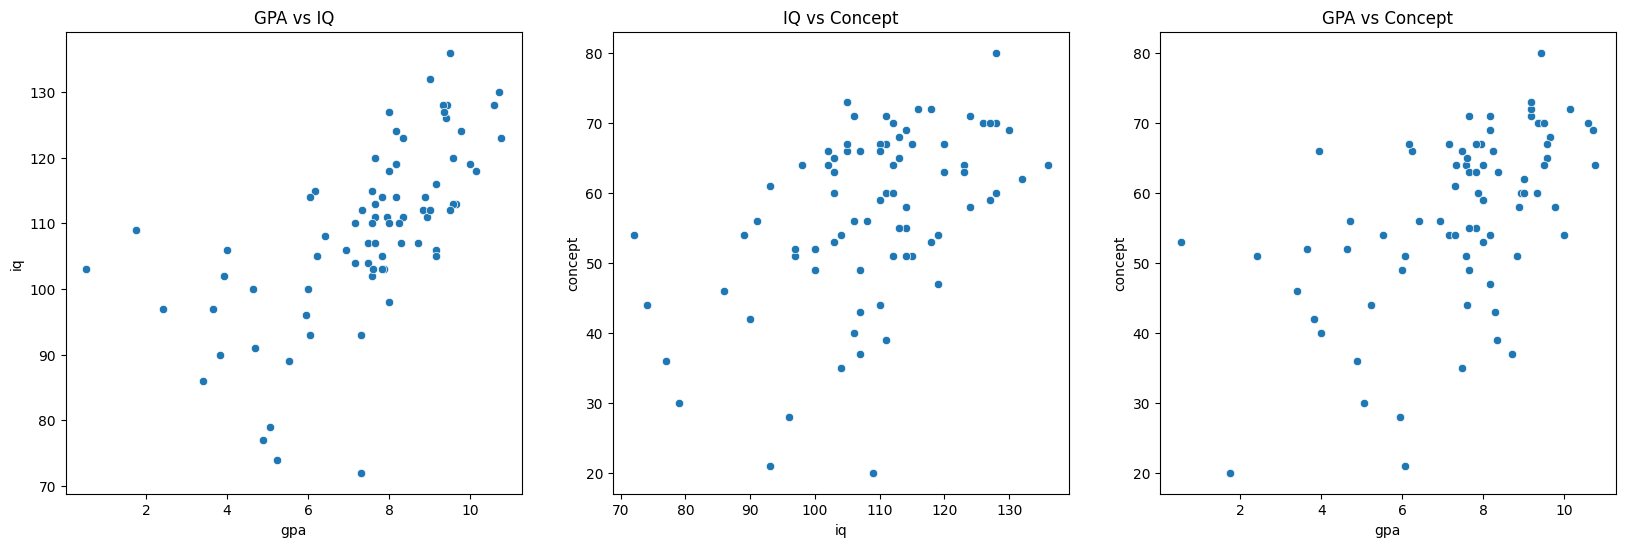

In [42]:
# Create a figure with a size of 20x6 inches
plt.figure(figsize=(20, 6))

# Subplot 1: GPA vs IQ with Gender Differentiation
plt.subplot(1, 3, 1)  # 1 row, 3 columns, this is the 1st subplot
sns.scatterplot(data=data, x='gpa', y='iq')  # Create a scatter plot with different colors for each gender
plt.title('GPA vs IQ')  # Set the title of the subplot

# Subplot 2: IQ vs Concept with Gender Differentiation
plt.subplot(1, 3, 2)  # 1 row, 3 columns, this is the 2nd subplot
sns.scatterplot(data=data, x='iq', y='concept')  # Create a scatter plot with different colors for each gender
plt.title('IQ vs Concept')  # Set the title of the subplot

# Subplot 3: GPA vs Concept with Gender Differentiation
plt.subplot(1, 3, 3)  # 1 row, 3 columns, this is the 3rd subplot
sns.scatterplot(data=data, x='gpa', y='concept')  # Create a scatter plot with different colors for each gender
plt.title('GPA vs Concept')  # Set the title of the subplot

# Display the subplots in the figure
plt.show()


In the "GPA vs. IQ" scatter plot, there is a positive correlation indicating a relationship between a person's IQ and their GPA. Generally, the higher a person's IQ, the higher their GPA tends to be. However, it's important to note that there are some conditions that can explain exceptions to this relationship.

There are cases where an individual has an above-average IQ (above 100) but obtains a low GPA. This may be due to a lack of understanding of the concepts taught, which can occur for various reasons such as absenteeism or a lack of effort in learning. Conversely, there are situations where someone has a lower IQ but manages to achieve a high GPA. This can happen because of their ability to understand concepts well and possibly because they are very diligent in their studies.

In the "IQ vs. Concept" scatter plot, the positive correlation indicates that the higher a person's IQ, the easier it is for them to understand concepts. However, there are cases where someone has a high IQ but struggles to comprehend concepts. This could be due to a lack of effort in studying or a lack of attention to the explanations provided by instructors. On the other hand, there are individuals with a not-so-high IQ who have the ability to understand concepts well. This can occur because they study diligently or pay close attention to the explanations given by instructors.

In the "GPA vs. Concept" scatter plot, the positive correlation suggests that the better someone understands concepts, the higher their GPA is likely to be. Nevertheless, there are situations in which someone comprehends concepts well but obtains a low GPA. This may be due to various grading factors, which do not solely depend on concept understanding. For instance, class attendance and the level of active participation can also influence the assessment. Therefore, someone who understands concepts well but has a low GPA may be affected by factors such as absenteeism, lack of active participation, or even non-participation in exams.

## Matrix Correlation

<Axes: >

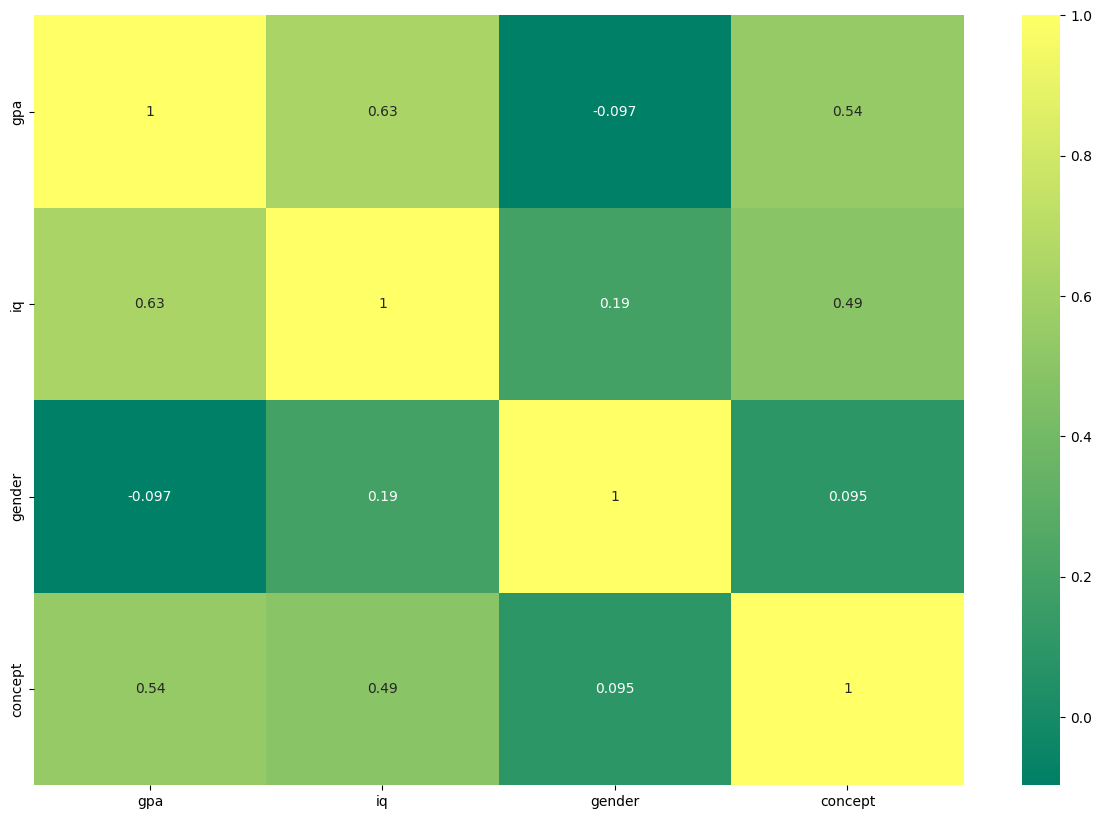

In [40]:
corr = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='summer')

Positive Correlation between GPA/IQ and Concept: The variables "gpa" (GPA) and "iq" (IQ) exhibit a positive correlation with the "concept" variable in the heatmap. This indicates that in this dataset, there is a positive relationship between the level of GPA or IQ and cognitive concept scores. In other words, individuals with higher GPA or IQ levels tend to have higher cognitive concept scores.

Weak Positive Correlation between Gender and IQ: There is a weak positive correlation (0.19) between gender and IQ in this dataset. This suggests that gender may have a minor influence on IQ, but the effect is relatively small.

Very Weak Positive Correlation between Gender and Concept: The heatmap shows a very weak positive correlation (0.095) between gender and cognitive concept scores. This implies that gender has an almost negligible impact on cognitive concept scores in this dataset.

Very Weak Negative Correlation between Gender and GPA: A very weak negative correlation (-0.097) is observed between gender and GPA. This suggests that there is a slight negative relationship between gender and GPA. However, the influence of gender on GPA is minuscule, and other factors are likely to have a more significant impact on an individual's GPA in this dataset.

These improved insights provide a clearer understanding of the relationships between variables in the dataset and emphasize the strength (or weakness) of these correlations.

## Principal Component Analysis (PCA)

In [7]:
data_cls = data.copy()

In [8]:
data_cls = data_cls.drop(columns = ['gender'])

In [9]:
df_pca = StandardScaler().fit_transform(data_cls)

In [10]:
pca= PCA(n_components=2)
reduced_data= pca.fit_transform(df_pca)

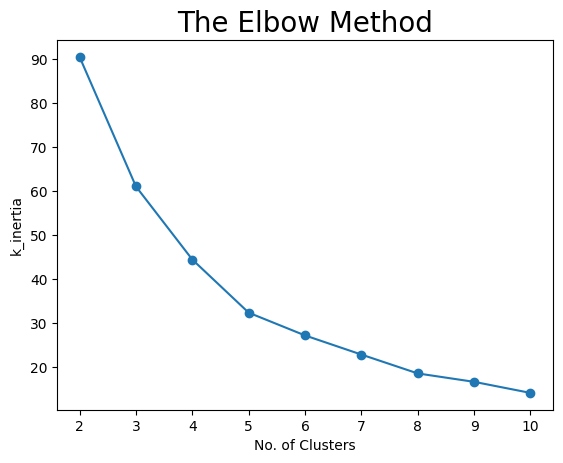

In [11]:
k_inertia = []
#membuat iterasi dari 2-10 untuk nilai k terbaik
for i in range(2, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
    km.fit(reduced_data)
    k_inertia.append(km.inertia_)

plt.plot(range(2, 11), k_inertia, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('k_inertia')
plt.show()

In [12]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
km.fit(reduced_data)

KMeans(n_clusters=5, random_state=3)

In [13]:
clusters= km.predict(reduced_data)

In [14]:
reduced_data= pd.DataFrame(reduced_data, columns= ['PC1','PC2'])
reduced_data.head()

,PC1,PC2
0,-0.681108,-0.526871
1,0.464723,0.959006
2,1.423079,-0.362233
3,-0.323433,-0.673879
4,-0.684421,0.305271


In [15]:
reduced_data['clusters']= clusters
reduced_data.head()

,PC1,PC2,clusters
0,-0.681108,-0.526871,3
1,0.464723,0.959006,0
2,1.423079,-0.362233,2
3,-0.323433,-0.673879,3
4,-0.684421,0.305271,3


In [16]:
pca_df_cluster = pd.concat([data, reduced_data], axis=1)

In [17]:
pca_df_cluster

,gpa,iq,gender,concept,PC1,PC2,clusters
0,7.940,111,2,67,-0.681108,-0.526871,3
1,8.292,107,2,43,0.464723,0.959006,0
2,4.643,100,2,52,1.423079,-0.362233,2
3,7.470,107,2,66,-0.323433,-0.673879,3
4,8.882,114,1,58,-0.684421,0.305271,3
...,...,...,...,...,...,...,...
73,9.000,112,1,60,-0.718181,0.108757,3
74,9.500,112,1,70,-1.306879,-0.495602,4
75,6.057,114,2,51,0.437850,0.423516,0
76,6.057,93,1,21,2.709554,1.603799,1


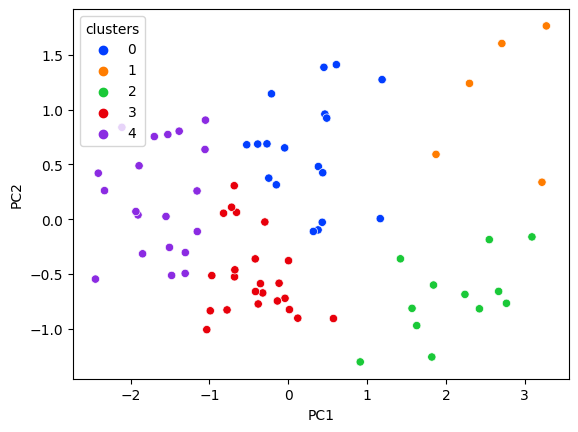

In [18]:
sns.scatterplot(data=pca_df_cluster, x="PC1", y="PC2", hue="clusters",palette="bright")
plt.show()

In [19]:
df = pca_df_cluster.drop(columns = ['PC1','PC2'])

## Analysis Clusters

<Axes: xlabel='clusters', ylabel='count'>

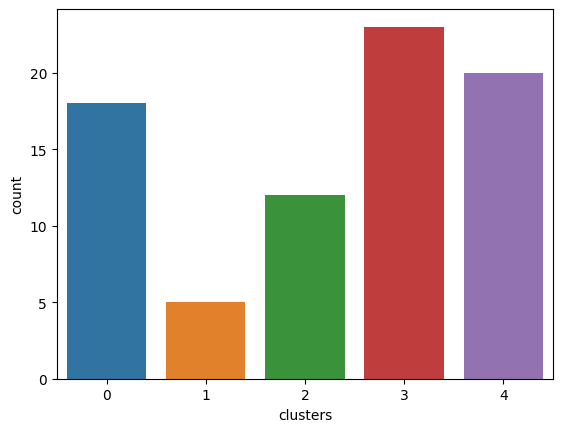

In [20]:
sns.countplot(data = df, x='clusters')

In [21]:
c0 = df[df.clusters == 0]
c1 = df[df.clusters == 1]
c2 = df[df.clusters == 2]
c3 = df[df.clusters == 3]
c4 = df[df.clusters == 4]

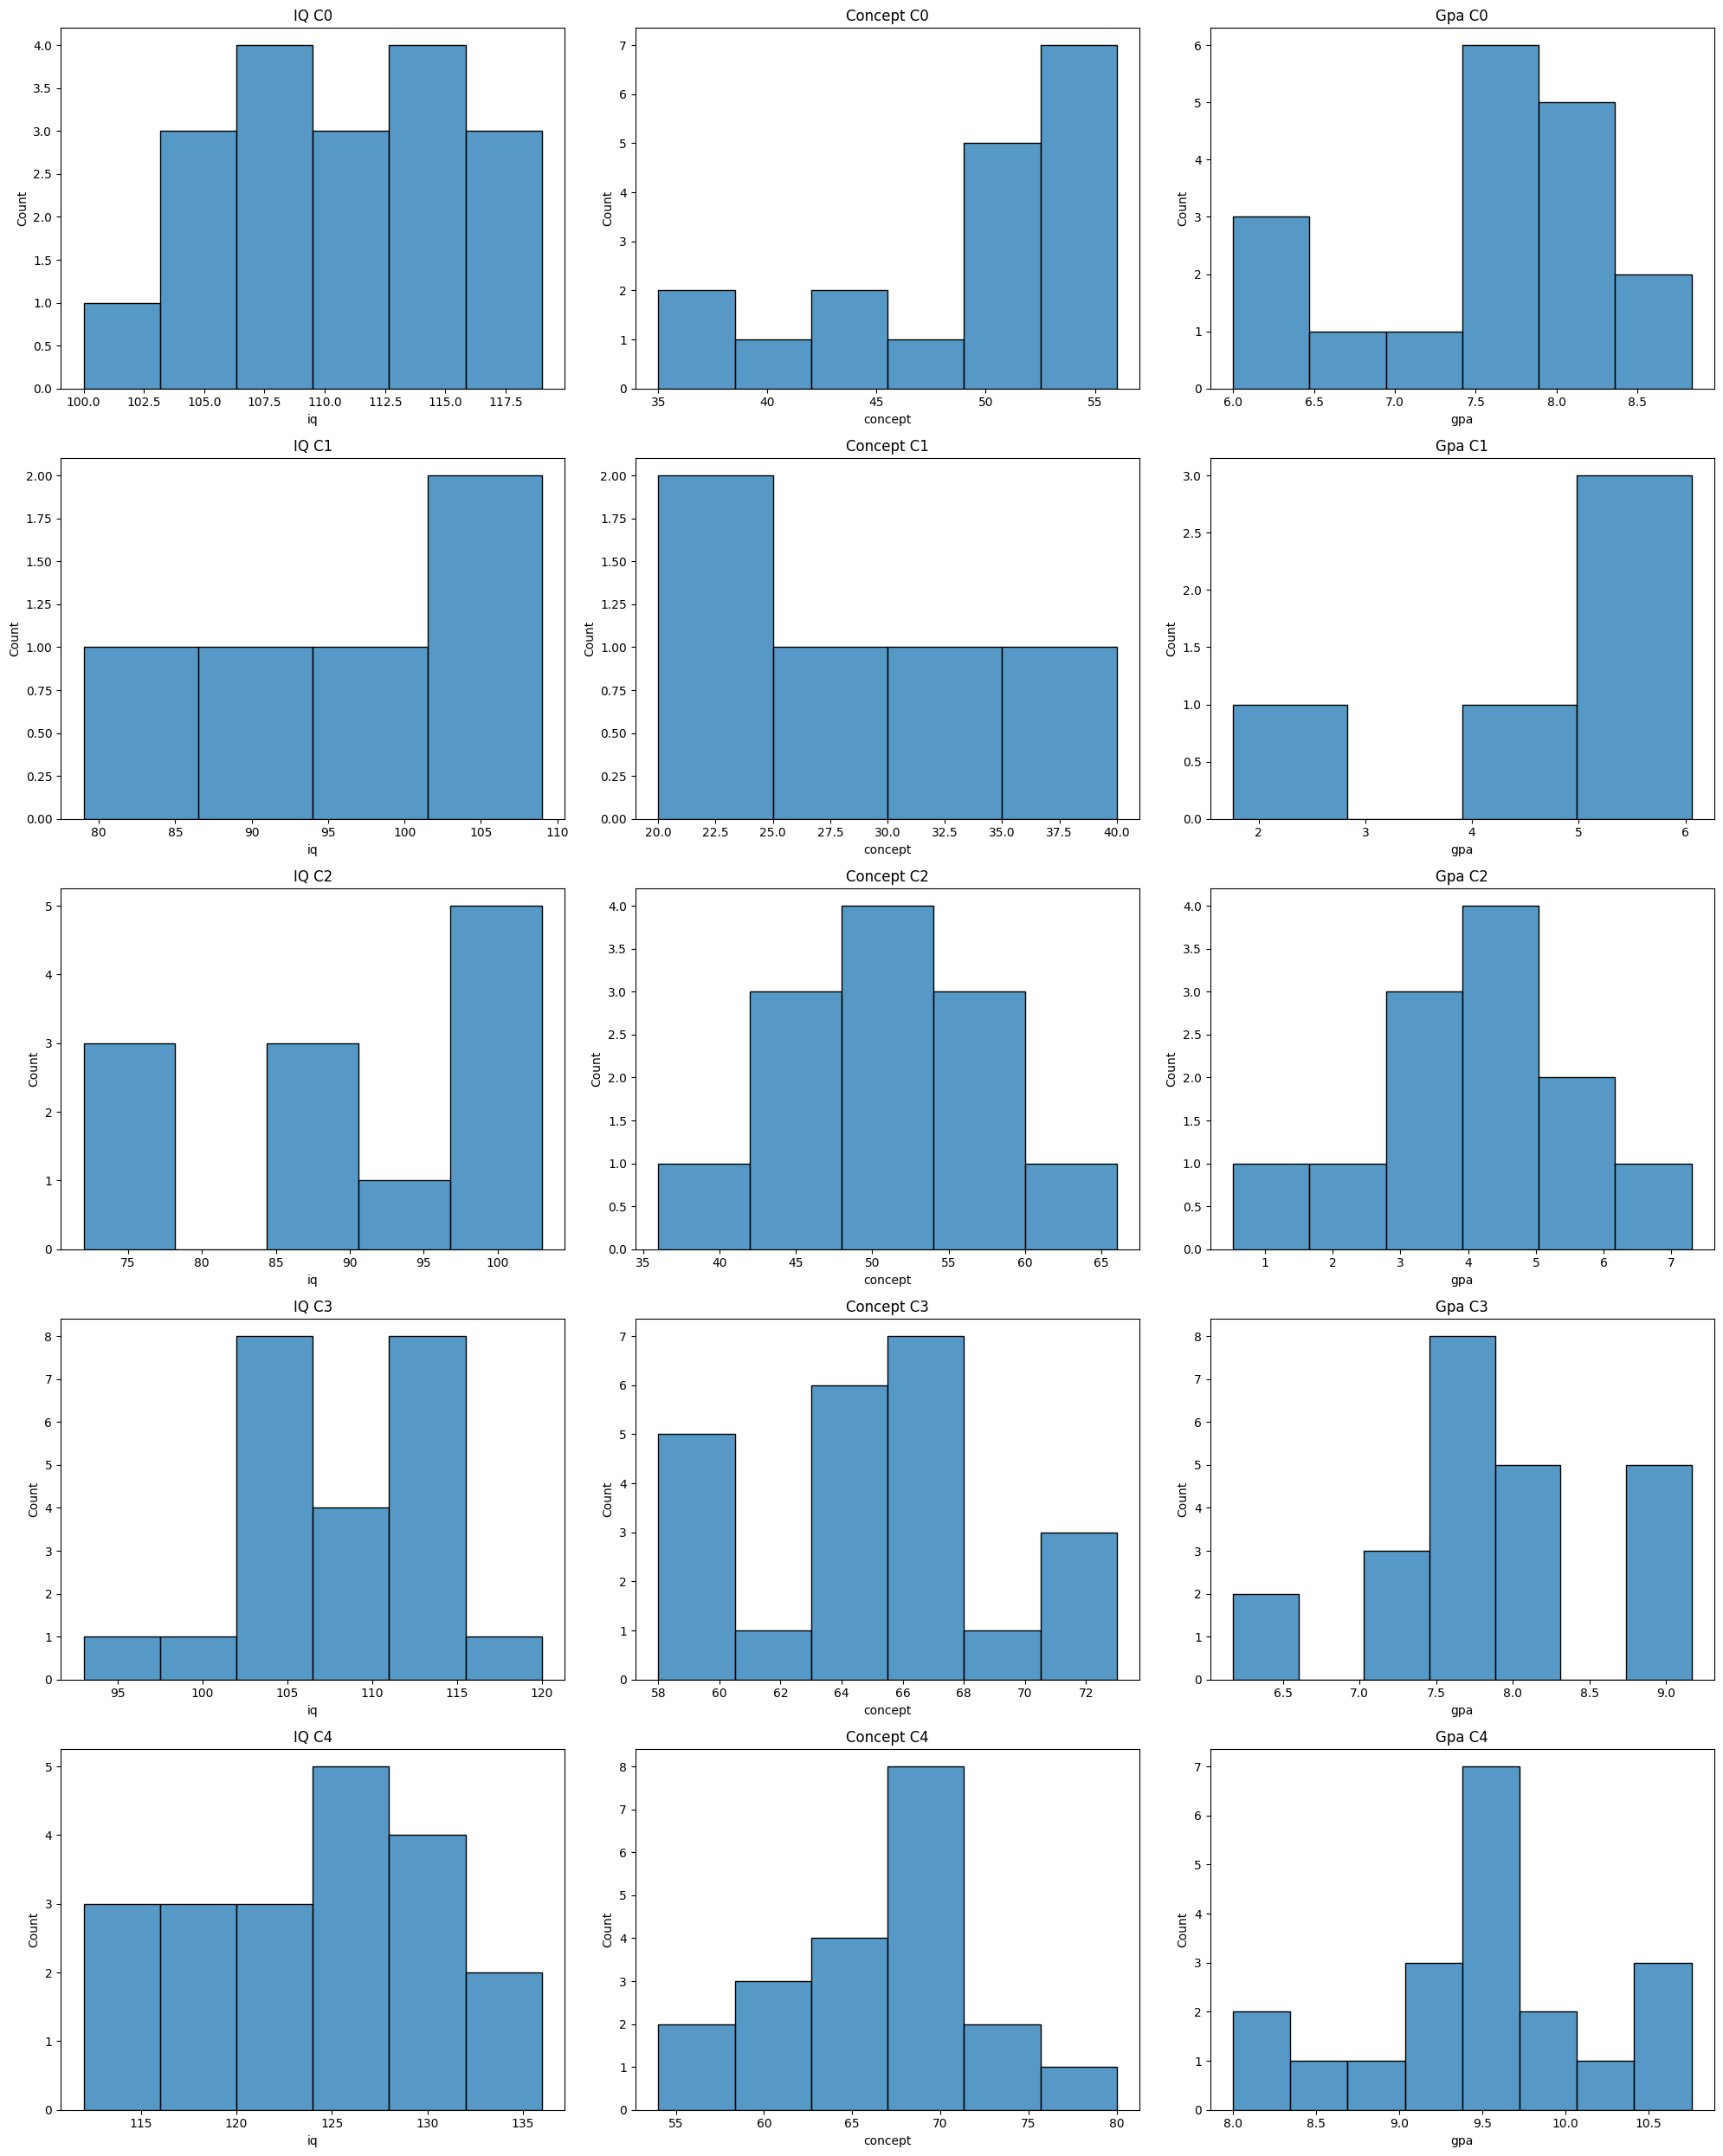

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_iq_histograms(dataframes):
    num_plots = len(dataframes)

    # Tentukan ukuran gambar
    plt.figure(figsize=(20, 5 * num_plots))

    for i, df in enumerate(dataframes):
        plt.subplot(num_plots, 3, i * 3 + 1)  # Munculkan "iqc" di gambar 1, 4, 7, dan seterusnya
        sns.histplot(x=df.iq)  # Kolom "iqc"
        plt.title(f'IQ C{i}')

        plt.subplot(num_plots, 3, i * 3 + 2)
        sns.histplot(x=df.concept)  # Kolom "conceptc"
        plt.title(f'Concept C{i}')

        plt.subplot(num_plots, 3, i * 3 + 3)
        sns.histplot(x=df.gpa)  # Kolom "gpac"
        plt.title(f'Gpa C{i}')

    plt.tight_layout()
    plt.show()

dataframes = [c0, c1, c2, c3, c4]
plot_iq_histograms(dataframes)


In [112]:
c0.describe().T

,count,mean,std,min,25%,50%,75%,max
gpa,18.0,7.602778,0.826807,6.0,7.24275,7.645,8.173,8.833
iq,18.0,110.444444,5.490336,100.0,107.00000,110.500,114.000,119.000
gender,18.0,1.666667,0.485071,1.0,1.00000,2.000,2.000,2.000
concept,18.0,48.833333,6.653173,35.0,44.75000,51.000,54.000,56.000
clusters,18.0,0.000000,0.000000,0.0,0.00000,0.000,0.000,0.000


In [24]:
c1.describe().T

,count,mean,std,min,25%,50%,75%,max
gpa,5.0,4.563,1.770589,1.76,4.0,5.062,5.936,6.057
iq,5.0,96.600,11.886968,79.00,93.0,96.000,106.000,109.000
gender,5.0,1.600,0.547723,1.00,1.0,2.000,2.000,2.000
concept,5.0,27.800,8.074652,20.00,21.0,28.000,30.000,40.000
clusters,5.0,1.000,0.000000,1.00,1.0,1.000,1.000,1.000


In [25]:
c2.describe().T

,count,mean,std,min,25%,50%,75%,max
gpa,12.0,4.170083,1.682415,0.53,3.58725,4.2895,4.973,7.295
iq,12.0,89.833333,10.777361,72.00,83.75000,90.5000,97.750,103.000
gender,12.0,1.583333,0.514929,1.00,1.00000,2.0000,2.000,2.000
concept,12.0,50.500000,7.692972,36.00,45.50000,52.0000,54.000,66.000
clusters,12.0,2.000000,0.000000,2.00,2.00000,2.0000,2.000,2.000


In [26]:
c3.describe().T

,count,mean,std,min,25%,50%,75%,max
gpa,23.0,7.876739,0.802497,6.173,7.5205,7.833,8.201,9.167
iq,23.0,107.826087,6.042668,93.000,104.0000,110.000,111.500,120.000
gender,23.0,1.521739,0.510754,1.000,1.0000,2.000,2.000,2.000
concept,23.0,64.826087,4.030026,58.000,62.0000,65.000,67.000,73.000
clusters,23.0,3.000000,0.000000,3.000,3.0000,3.000,3.000,3.000


In [27]:
c4.describe().T

,count,mean,std,min,25%,50%,75%,max
gpa,20.0,9.49795,0.750583,8.0,9.2915,9.5,9.822,10.76
iq,20.0,123.35000,6.627495,112.0,118.7500,124.0,128.000,136.00
gender,20.0,1.65000,0.489360,1.0,1.0000,2.0,2.000,2.00
concept,20.0,66.40000,6.047183,54.0,62.7500,67.5,70.000,80.00
clusters,20.0,4.00000,0.000000,4.0,4.0000,4.0,4.000,4.00


## Overall Analysis

**Cluster 0: Balanced Achievers**

Cluster 0 represents a group of students characterized by a well-rounded academic performance. Their GPAs fall within the range of 6 to 8.8, indicating consistent and respectable grades. Their IQ scores range from 100 to 119, suggesting above-average cognitive abilities. In terms of conceptual understanding, their scores range from 35 to 56, implying a decent grasp of the subject matter. This cluster portrays students who excel across multiple areas and maintain a good balance between their intellectual capabilities, academic achievements, and understanding of concepts.

**Cluster 1: Striving Improvers**

Cluster 1 encompasses students who are working hard to improve their academic standing. Their GPAs span from 1.76 to 6, indicating a range of academic progress. Their IQ scores range from 79 to 109, showcasing a varying degree of cognitive abilities. In terms of conceptual understanding, scores range from 20 to 40, suggesting efforts to comprehend the subject matter. This cluster indicates students who are in the process of elevating their academic performance and refining their cognitive and conceptual skills.

**Cluster 2: Learning Challengers**

Cluster 2 comprises students who are facing challenges in their academic journey. Their GPAs range from 0.5 to 7.3, reflecting a wide variation in academic performance. IQ scores range from 72 to 103, suggesting diverse cognitive abilities. Their scores in conceptual understanding span from 36 to 66, indicating a struggle to fully grasp the subject matter. This cluster represents students who are encountering difficulties in maintaining consistent academic achievements and face obstacles in comprehending complex concepts.

**Cluster 3: High Achieving Scholars**

Cluster 3 consists of high-achieving students who excel across different metrics. Their GPAs range from 6.17 to 9.16, reflecting exceptional academic performance. IQ scores span from 93 to 120, indicating above-average to high cognitive abilities. Their conceptual understanding scores range from 58 to 73, suggesting a profound grasp of the subject matter. This cluster portrays students who consistently perform at a superior level, displaying not only exceptional cognitive skills but also a deep comprehension of complex concepts.

**Cluster 4: Elite Intellectuals**

Cluster 4 represents a group of intellectually advanced students. Their GPAs range from 8 to 10.76, indicating consistently high academic achievement. IQ scores range from 112 to 136, showcasing exceptional cognitive abilities. Conceptual understanding scores span from 54 to 80, suggesting a profound grasp of complex subject matter. This cluster embodies students who are not only academically outstanding but also possess exceptional cognitive skills, allowing them to effortlessly comprehend intricate concepts.

In summary, the clusters demonstrate varying levels of academic performance, cognitive abilities, and conceptual understanding. These distinctions provide insights into the diverse student profiles within the dataset, showcasing different degrees of academic achievements and intellectual capacities.